# Sakila database (DataJoint)

In [1]:
import datajoint as dj

In [2]:
schema = dj.Schema('shared_sakila')

Connecting dimitri@db.ust-db.link:3306


In [3]:
schema.spawn_missing_classes()

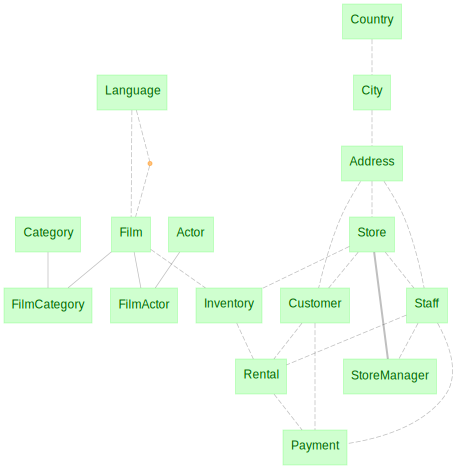

In [4]:
dj.Diagram(schema)

In [6]:
Store()

store_id,manager_staff_id,address_id,last_update
1,1,1,2006-02-15 04:57:12
2,2,2,2006-02-15 04:57:12


In [30]:
Payment() & 'amount >= 11'

payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
342,13,2,8831,11.99,2005-07-29 22:37:41,2006-02-15 22:12:31
3146,116,2,14763,11.99,2005-08-21 23:34:00,2006-02-15 22:13:08
5280,195,2,16040,11.99,2005-08-23 22:19:33,2006-02-15 22:14:00
5281,196,2,106,11.99,2005-05-25 18:18:19,2006-02-15 22:14:00
5550,204,2,15415,11.99,2005-08-22 23:48:56,2006-02-15 22:14:07
6409,237,2,11479,11.99,2005-08-02 22:18:13,2006-02-15 22:14:38
8272,305,1,2166,11.99,2005-06-17 23:51:21,2006-02-15 22:15:47
9803,362,1,14759,11.99,2005-08-21 23:28:58,2006-02-15 22:16:57
15821,591,2,4383,11.99,2005-07-07 20:45:51,2006-02-15 22:23:18
15850,592,1,3973,11.99,2005-07-06 22:58:31,2006-02-15 22:23:25


In [49]:
Actor & (FilmActor.proj() & (Film & (FilmCategory.proj() & (Category() & 'name="Horror"'))))

actor_id,first_name,last_name,last_update
1,PENELOPE,GUINESS,2006-02-15 04:34:33
4,JENNIFER,DAVIS,2006-02-15 04:34:33
5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
7,GRACE,MOSTEL,2006-02-15 04:34:33
9,JOE,SWANK,2006-02-15 04:34:33
10,CHRISTIAN,GABLE,2006-02-15 04:34:33
11,ZERO,CAGE,2006-02-15 04:34:33
12,KARL,BERRY,2006-02-15 04:34:33
13,UMA,WOOD,2006-02-15 04:34:33
14,VIVIEN,BERGEN,2006-02-15 04:34:33


In [60]:
Customer.proj().aggr(Rental, n='count(*)') & 'n > 45'

customer_id,n calculated attribute
148,46


In [16]:
dj.conn().query("""
ALTER TABLE shared_sakila.store DROP FOREIGN KEY fk_store_staff;
""")

```python
# drop cyclic foreign key
dj.conn().query("""
ALTER TABLE shared_sakila.store DROP FOREIGN KEY fk_store_staff;
""")

# restore cyclic foreign key
dj.conn().query("""
ALTER TABLE shared_sakila.store 
    ADD FOREIGN KEY `fk_store_staff` (`manager_staff_id`) REFERENCES `staff`(`staff_id`);
""")
```

In [ ]:
dj.conn().query("ALTER TABLE shared_sakila.store DROP FOREIGN KEY fk_store_staff;")

In [ ]:
dj.Diagram(schema)

In [ ]:
dj.conn().query("""
ALTER TABLE shared_sakila.store 
    ADD FOREIGN KEY `fk_store_staff` (`manager_staff_id`) REFERENCES `staff`(`staff_id`);
""")

In [ ]:
dj.Diagram(schema)

In [ ]:
@schema
class StoreManager(dj.Manual):
    definition = """
    -> Store
    ---
    -> Staff
    """

In [ ]:
FilmText.drop()

In [ ]:
dj.conn().query("""
ALTER TABLE shared_sakila.inventory 
    ADD FOREIGN KEY (`film_id`) REFERENCES `shared_sakila`.`film_text`(`film_id`);
""")

## Virtual module

In [ ]:
import datajoint as dj

In [ ]:
sakila = dj.VirtualModule('sakila', 'shared_sakila')

In [ ]:
sakila

In [ ]:
dir(sakila)

In [ ]:
dj.Diagram(sakila)

In [ ]:
sakila.schema.save('sakila.py')

In [ ]:
print(dj.conn().query('SHOW CREATE TABLE shared_sakila.store').fetchone()[1])

In [ ]:
dj.Diagram(schema)

In [ ]:
Staff.proj(seller='concat(first_name, " ", last_name)') * Rental.proj(..., '-last_update')

In [ ]:
Rental()

In [ ]:
Film.describe();

In [ ]:
Film()

In [ ]:
Film & 'original_language_id is not NULL'

In [ ]:
Language()

In [ ]:
Language().describe();

# DataJoint Queries

In [ ]:
dj.Diagram(schema)

In [ ]:
q = Actor()

In [ ]:
q

In [ ]:
a = query.fetch(as_dict=True, order_by=('last_name', 'first_name'), limit=10, offset=10)

In [ ]:
q & 'month(last_update) = 3'

In [ ]:
q.proj(..., cid="customer_id")

In [ ]:
q

In [ ]:
last_rental = (Rental() & 'return_date > "2005-09-02"').proj('customer_id')

In [ ]:
last_rentals

In [ ]:
last_rental.fetch(as_dict=True)

In [ ]:
Customer & last_rental

# PyMySQL

In [ ]:
print(last_rental.make_sql())

In [ ]:
import pymysql 


In [ ]:
conn = pymysql.connect(
    host=dj.config['database.host'],
    passwd=dj.config['database.password'],
    user=dj.config['database.user'])

In [ ]:
cursor = conn.cursor()

In [ ]:
cursor.execute('SHOW SCHEMAS')

In [ ]:
cursor.execute('USE shared_sakila')

In [ ]:
cursor.execute('SHOW TABLES')

In [ ]:
cursor.fetchall()

In [ ]:
cursor.execute('SELECT * FROM customer')

In [ ]:
cursor.execute('SELECT * FROM customer WHERE customer_id = 1 ')

In [ ]:
cursor.fetchall()

In [ ]:
cursor.execute('SELECT * FROM rental WHERE return_date > "2005-09-02" ')

In [ ]:
cursor.execute('SELECT * FROM rental WHERE return_date is NULL')

In [ ]:
cursor.execute('SELECT * FROM rental WHERE return_date is NOT NULL')

In [ ]:
Customer & (Rental & 'return_date is NULL').proj('customer_id') 

In [ ]:
cursor.execute(
    """
    SELECT * 
    FROM customer 
    WHERE customer_id IN (
        SELECT customer_id 
        FROM rental 
        WHERE return_date IS NULL)
    """)

In [ ]:
cursor.execute("SELECT customer_id, rental_date FROM rental")

In [ ]:
cursor.fetchone()

In [ ]:
cursor.execute("SELECT DISTINCT customer_id FROM rental")

In [ ]:
cursor.execute("SELECT DISTINCT customer_id FROM rental WHERE return_date IS NULL")

In [ ]:
cursor.execute("SELECT DISTINCT customer_id cid FROM rental WHERE return_date IS NULL")

In [ ]:
Store()

In [ ]:
Rental()

### Problem 1

Show all rentals of intentory from Store 1

In [ ]:
q = Rental & (Inventory() & 'store_id=1').proj()

In [ ]:
(Rental * Customer.proj(..., '-last_update')).make_sql()

In [ ]:
cursor.execute("""
SELECT * FROM rental 
WHERE inventory_id IN (SELECT inventory_id FROM inventory WHERE store_id=1)
""")

### Problem 2

Show all staff that work at Store 1

In [ ]:
Staff() & 'store_id=1'

In [ ]:
cursors.execute("""
SELECT staff_id 
FROM staff 
WHERE store_id=1
""")